**Import required libraries.**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

**Preprocessing step**

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image_path = os.path.join(path, a)
            
            image = Image.open(image_path)
            image = image.resize((30, 30))  # preprocessing step to resize
            image = np.array(image)
            
            data.append(image)
            labels.append(i)
            
        except:
            print("Error loading image:", image_path)
        
        print(f"Processed image: {a} in path: {path}")  # print statement to track progress
        
    print(f"Completed processing class: {i}")  # print statement to track progress


Processed image: 00000_00000_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00000_00011.png in p

Processed image: 00000_00003_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00003_00022.png in p

Processed image: 00000_00006_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00006_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00006_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Processed image: 00000_00006_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\0
Completed processing class: 0
Processed image: 00001_00000_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00000_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00000_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00000_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00000_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00000_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00000_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed ima

Processed image: 00001_00003_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00003_00015.png in p

Processed image: 00001_00006_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00006_00021.png in p

Processed image: 00001_00009_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00010_00010.png in p

Processed image: 00001_00013_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00013_00027.png in p

Processed image: 00001_00016_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00016_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00016_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00016_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00016_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00016_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00016_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00016_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00017_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00017_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00017_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00017_00003.png in p

Processed image: 00001_00020_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00020_00023.png in p

Processed image: 00001_00023_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00023_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00023_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00023_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00023_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00023_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00023_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00023_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00023_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00023_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00024_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00024_00001.png in p

Processed image: 00001_00027_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00027_00018.png in p

Processed image: 00001_00030_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00030_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00030_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00030_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00030_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00030_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00030_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00030_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00031_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00031_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00031_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00031_00003.png in p

Processed image: 00001_00034_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00034_00012.png in p

Processed image: 00001_00037_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00037_00018.png in p

Processed image: 00001_00040_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00040_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00040_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00040_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00040_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00041_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00041_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00041_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00041_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00041_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00041_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00041_00006.png in p

Processed image: 00001_00044_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00044_00024.png in p

Processed image: 00001_00048_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00048_00012.png in p

Processed image: 00001_00051_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00051_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00051_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00051_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00051_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00051_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00051_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00051_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00051_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00051_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00052_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00052_00001.png in p

Processed image: 00001_00055_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00055_00013.png in p

Processed image: 00001_00058_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00058_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00059_00000.png in p

Processed image: 00001_00062_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00062_00014.png in p

Processed image: 00001_00065_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00065_00019.png in p

Processed image: 00001_00068_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00068_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00068_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00068_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00069_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00069_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00069_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00069_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00069_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00069_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00069_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00069_00007.png in p

Processed image: 00001_00072_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\1
Processed image: 00001_00072_00025.png in p

Processed image: 00002_00002_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00002_00011.png in p

Processed image: 00002_00005_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00005_00016.png in p

Processed image: 00002_00008_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00008_00026.png in p

Processed image: 00002_00011_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00011_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00011_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00011_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00011_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00011_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00011_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00011_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00011_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00012_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00012_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00012_00002.png in p

Processed image: 00002_00015_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00015_00019.png in p

Processed image: 00002_00018_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00018_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00018_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00018_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00019_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00019_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00019_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00019_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00019_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00019_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00019_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00019_00007.png in p

Processed image: 00002_00022_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00022_00026.png in p

Processed image: 00002_00025_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00025_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00025_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00025_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00025_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00025_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00025_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00025_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00025_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00026_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00026_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00026_00002.png in p

Processed image: 00002_00029_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00029_00020.png in p

Processed image: 00002_00032_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00032_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00032_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00033_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00033_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00033_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00033_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00033_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00033_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00033_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00033_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00033_00008.png in p

Processed image: 00002_00036_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00036_00013.png in p

Processed image: 00002_00039_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00039_00021.png in p

Processed image: 00002_00042_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00042_00029.png in p

Processed image: 00002_00046_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00046_00018.png in p

Processed image: 00002_00050_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00050_00015.png in p

Processed image: 00002_00053_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00053_00020.png in p

Processed image: 00002_00056_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00056_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00056_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00056_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00056_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00056_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00056_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00056_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00056_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00056_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00057_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00057_00001.png in p

Processed image: 00002_00059_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00059_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00059_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00059_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00060_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00060_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00060_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00060_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00060_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00060_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00060_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00060_00007.png in p

Processed image: 00002_00063_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00063_00025.png in p

Processed image: 00002_00067_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00067_00014.png in p

Processed image: 00002_00070_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00070_00020.png in p

Processed image: 00002_00073_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\2
Processed image: 00002_00074_00010.png in p

Processed image: 00003_00002_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00002_00017.png in p

Processed image: 00003_00005_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00005_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00005_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00005_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00005_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00006_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00006_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00006_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00006_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00006_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00006_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00006_00006.png in p

Processed image: 00003_00009_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00009_00025.png in p

Processed image: 00003_00013_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00013_00014.png in p

Processed image: 00003_00016_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00016_00021.png in p

Processed image: 00003_00019_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00020_00010.png in p

Processed image: 00003_00023_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00023_00028.png in p

Processed image: 00003_00027_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00027_00011.png in p

Processed image: 00003_00030_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00030_00020.png in p

Processed image: 00003_00034_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00034_00016.png in p

Processed image: 00003_00038_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00038_00012.png in p

Processed image: 00003_00041_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00041_00018.png in p

Processed image: 00003_00044_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00044_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00044_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00044_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00044_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00044_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00044_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00044_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00045_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00045_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00045_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\3
Processed image: 00003_00045_00003.png in p

Processed image: 00004_00001_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00001_00021.png in p

Processed image: 00004_00004_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00004_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00004_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00004_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00004_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00004_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00004_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00004_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00004_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00005_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00005_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00005_00002.png in p

Processed image: 00004_00008_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00008_00014.png in p

Processed image: 00004_00011_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00011_00022.png in p

Processed image: 00004_00014_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00014_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00015_00000.png in p

Processed image: 00004_00017_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00017_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00017_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00017_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00017_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00017_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00018_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00018_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00018_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00018_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00018_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00018_00005.png in p

Processed image: 00004_00021_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00021_00012.png in p

Processed image: 00004_00024_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00024_00018.png in p

Processed image: 00004_00027_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00027_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00027_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00027_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00027_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00027_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00027_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00028_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00028_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00028_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00028_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00028_00004.png in p

Processed image: 00004_00031_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00031_00023.png in p

Processed image: 00004_00034_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00034_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00034_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00034_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00034_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00034_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00034_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00035_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00035_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00035_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00035_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00035_00004.png in p

Processed image: 00004_00038_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00038_00013.png in p

Processed image: 00004_00041_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00041_00022.png in p

Processed image: 00004_00044_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00044_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00044_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00044_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00044_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00044_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00044_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00044_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00044_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00045_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00045_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00045_00002.png in p

Processed image: 00004_00047_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00047_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00047_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00048_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00048_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00048_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00048_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00048_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00048_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00048_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00048_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00048_00008.png in p

Processed image: 00004_00051_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00051_00020.png in p

Processed image: 00004_00055_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00055_00015.png in p

Processed image: 00004_00058_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00058_00021.png in p

Processed image: 00004_00061_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00061_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00061_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00061_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00061_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00061_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00061_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00061_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00062_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00062_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00062_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00062_00003.png in p

Processed image: 00004_00065_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\4
Processed image: 00004_00065_00011.png in p

Processed image: 00005_00002_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00002_00024.png in p

Processed image: 00005_00005_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00005_00029.png in p

Processed image: 00005_00008_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00008_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00008_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00008_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00008_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00008_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00009_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00009_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00009_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00009_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00009_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00009_00005.png in p

Processed image: 00005_00011_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00012_00010.png in p

Processed image: 00005_00015_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00015_00022.png in p

Processed image: 00005_00019_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00019_00014.png in p

Processed image: 00005_00022_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00022_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00022_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00022_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00022_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00023_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00023_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00023_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00023_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00023_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00023_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00023_00006.png in p

Processed image: 00005_00026_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00026_00025.png in p

Processed image: 00005_00030_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00030_00024.png in p

Processed image: 00005_00033_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00033_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00033_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00033_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00033_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00033_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00033_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00034_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00034_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00034_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00034_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00034_00004.png in p

Processed image: 00005_00037_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00037_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00037_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00037_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00037_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00037_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00037_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00037_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00037_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00038_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00038_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00038_00002.png in p

Processed image: 00005_00041_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00041_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00042_00009.png in p

Processed image: 00005_00045_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00045_00015.png in p

Processed image: 00005_00048_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00049_00010.png in p

Processed image: 00005_00052_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00052_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00052_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00052_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00052_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00052_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00052_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00053_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00053_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00053_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00053_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00053_00004.png in p

Processed image: 00005_00056_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00056_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00057_00000.png in p

Processed image: 00005_00060_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00060_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00060_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00060_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00060_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00060_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00060_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00060_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00060_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00060_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00061_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\5
Processed image: 00005_00061_00001.png in p

Processed image: 00006_00002_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00002_00028.png in p

Processed image: 00006_00006_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00006_00011.png in p

Processed image: 00006_00010_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\6
Processed image: 00006_00010_00012.png in p

Processed image: 00007_00000_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00000_00011.png in p

Processed image: 00007_00004_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00004_00011.png in p

Processed image: 00007_00007_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00007_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00007_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00007_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00008_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00008_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00008_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00008_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00008_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00008_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00008_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00008_00007.png in p

Processed image: 00007_00011_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00011_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00011_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00012_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00012_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00012_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00012_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00012_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00012_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00012_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00012_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00012_00008.png in p

Processed image: 00007_00015_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00015_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00015_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00016_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00016_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00016_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00016_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00016_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00016_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00016_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00016_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00016_00008.png in p

Processed image: 00007_00019_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00019_00017.png in p

Processed image: 00007_00023_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00023_00014.png in p

Processed image: 00007_00027_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00027_00012.png in p

Processed image: 00007_00030_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00031_00010.png in p

Processed image: 00007_00034_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00034_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00035_00009.png in p

Processed image: 00007_00039_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00039_00011.png in p

Processed image: 00007_00043_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00043_00012.png in p

Processed image: 00007_00047_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\7
Processed image: 00007_00047_00015.png in p

Processed image: 00008_00003_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00003_00018.png in p

Processed image: 00008_00007_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00007_00016.png in p

Processed image: 00008_00011_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00011_00016.png in p

Processed image: 00008_00015_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00015_00016.png in p

Processed image: 00008_00019_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00019_00018.png in p

Processed image: 00008_00023_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00023_00019.png in p

Processed image: 00008_00027_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00027_00018.png in p

Processed image: 00008_00031_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00031_00017.png in p

Processed image: 00008_00035_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00035_00017.png in p

Processed image: 00008_00039_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00039_00019.png in p

Processed image: 00008_00043_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\8
Processed image: 00008_00043_00023.png in p

Processed image: 00009_00000_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00000_00023.png in p

Processed image: 00009_00004_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00004_00021.png in p

Processed image: 00009_00008_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00008_00018.png in p

Processed image: 00009_00012_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00012_00018.png in p

Processed image: 00009_00015_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00015_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00015_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00015_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00016_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00016_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00016_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00016_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00016_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00016_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00016_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00016_00007.png in p

Processed image: 00009_00019_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00019_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00019_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00019_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00019_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00020_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00020_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00020_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00020_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00020_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00020_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00020_00006.png in p

Processed image: 00009_00023_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00023_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00023_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00023_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00024_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00024_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00024_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00024_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00024_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00024_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00024_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00024_00007.png in p

Processed image: 00009_00027_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00027_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00028_00000.png in p

Processed image: 00009_00031_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00031_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00032_00000.png in p

Processed image: 00009_00035_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00035_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00036_00000.png in p

Processed image: 00009_00039_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00039_00015.png in p

Processed image: 00009_00043_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00043_00014.png in p

Processed image: 00009_00046_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\9
Processed image: 00009_00047_00010.png in p

Processed image: 00010_00002_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00002_000

Processed image: 00010_00005_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00006_000

Processed image: 00010_00010_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00010_000

Processed image: 00010_00013_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00013_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00013_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00013_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00013_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00013_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00013_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00013_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00013_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00014_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00014_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00014_000

Processed image: 00010_00017_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00017_000

Processed image: 00010_00021_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00021_000

Processed image: 00010_00025_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00025_000

Processed image: 00010_00029_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00029_000

Processed image: 00010_00032_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00032_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00032_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00032_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00032_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00032_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00033_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00033_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00033_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00033_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00033_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00033_000

Processed image: 00010_00036_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00036_000

Processed image: 00010_00040_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00040_000

Processed image: 00010_00044_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00044_000

Processed image: 00010_00048_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00048_000

Processed image: 00010_00052_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00052_000

Processed image: 00010_00056_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00056_000

Processed image: 00010_00059_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00060_000

Processed image: 00010_00063_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00063_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00063_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00063_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00064_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00064_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00064_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00064_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00064_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00064_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00064_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\10
Processed image: 00010_00064_000

Processed image: 00011_00000_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00000_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00000_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00000_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00000_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00000_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00000_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00000_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00001_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00001_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00001_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00001_000

Processed image: 00011_00004_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00004_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00004_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00004_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00004_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00004_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00004_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00004_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00004_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00005_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00005_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00005_000

Processed image: 00011_00008_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00008_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00008_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00008_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00008_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00008_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00008_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00008_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00008_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00009_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00009_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00009_000

Processed image: 00011_00012_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00012_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00012_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00012_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00012_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00012_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00012_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00012_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00012_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00012_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00013_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00013_000

Processed image: 00011_00016_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00016_000

Processed image: 00011_00020_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00020_000

Processed image: 00011_00024_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00024_000

Processed image: 00011_00028_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00028_000

Processed image: 00011_00032_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00032_000

Processed image: 00011_00036_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00036_000

Processed image: 00011_00040_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\11
Processed image: 00011_00040_000

Processed image: 00012_00000_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00000_000

Processed image: 00012_00004_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00004_000

Processed image: 00012_00008_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00008_000

Processed image: 00012_00011_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00011_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00011_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00011_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00012_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00012_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00012_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00012_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00012_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00012_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00012_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00012_000

Processed image: 00012_00015_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00015_000

Processed image: 00012_00019_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00019_000

Processed image: 00012_00022_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00022_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00022_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00022_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00022_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00022_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00022_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00023_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00023_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00023_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00023_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00023_000

Processed image: 00012_00026_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00026_000

Processed image: 00012_00029_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00029_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00030_000

Processed image: 00012_00033_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00033_000

Processed image: 00012_00037_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00037_000

Processed image: 00012_00040_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00040_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00040_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00040_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00040_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00041_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00041_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00041_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00041_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00041_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00041_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00041_000

Processed image: 00012_00044_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00044_000

Processed image: 00012_00047_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00047_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00047_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00047_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00047_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00047_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00047_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00047_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00048_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00048_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00048_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00048_000

Processed image: 00012_00051_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00052_000

Processed image: 00012_00055_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00055_000

Processed image: 00012_00059_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00059_000

Processed image: 00012_00062_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00062_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00062_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00062_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00062_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00062_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00062_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00063_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00063_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00063_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00063_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00063_000

Processed image: 00012_00066_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\12
Processed image: 00012_00066_000

Processed image: 00013_00000_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00000_000

Processed image: 00013_00003_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00003_000

Processed image: 00013_00007_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00007_000

Processed image: 00013_00010_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00010_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00010_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00010_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00010_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00010_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00010_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00010_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00010_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00010_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00011_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00011_000

Processed image: 00013_00014_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00014_000

Processed image: 00013_00017_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00017_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00017_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00017_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00017_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00017_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00017_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00018_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00018_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00018_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00018_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00018_000

Processed image: 00013_00021_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00021_000

Processed image: 00013_00024_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00024_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00025_000

Processed image: 00013_00028_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00028_000

Processed image: 00013_00032_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00032_000

Processed image: 00013_00035_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00035_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00035_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00035_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00035_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00035_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00036_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00036_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00036_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00036_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00036_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00036_000

Processed image: 00013_00039_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00039_000

Processed image: 00013_00043_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00043_000

Processed image: 00013_00046_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00046_000

Processed image: 00013_00050_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00050_000

Processed image: 00013_00053_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00053_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00053_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00053_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00053_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00053_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00054_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00054_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00054_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00054_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00054_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00054_000

Processed image: 00013_00057_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00057_000

Processed image: 00013_00061_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00061_000

Processed image: 00013_00064_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00064_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00065_000

Processed image: 00013_00068_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\13
Processed image: 00013_00068_000

Processed image: 00014_00000_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00000_000

Processed image: 00014_00003_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00003_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00004_000

Processed image: 00014_00007_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00007_000

Processed image: 00014_00010_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00010_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00010_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00010_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00010_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00010_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00010_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00010_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00011_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00011_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00011_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00011_000

Processed image: 00014_00014_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00014_000

Processed image: 00014_00017_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00017_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00017_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00017_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00017_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00017_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00017_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00017_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00017_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00018_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00018_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00018_000

Processed image: 00014_00021_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00021_000

Processed image: 00014_00024_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00024_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00024_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00024_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00024_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00024_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00024_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00024_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00025_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00025_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00025_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\14
Processed image: 00014_00025_000

Processed image: 00015_00002_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00002_000

Processed image: 00015_00006_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00006_000

Processed image: 00015_00009_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00009_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00009_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00009_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00010_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00010_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00010_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00010_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00010_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00010_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00010_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00010_000

Processed image: 00015_00013_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00013_000

Processed image: 00015_00017_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00017_000

Processed image: 00015_00020_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00020_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00020_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Processed image: 00015_00020_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\15
Completed processing class: 15
Processed image: 00016_00000_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00000_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00000_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00000_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00000_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00000_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00000_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\16
P

Processed image: 00016_00003_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00003_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00004_000

Processed image: 00016_00007_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00007_000

Processed image: 00016_00010_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00010_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00010_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00011_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00011_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00011_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00011_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00011_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00011_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00011_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00011_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\16
Processed image: 00016_00011_000

Processed image: 00017_00000_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00000_000

Processed image: 00017_00004_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00004_000

Processed image: 00017_00007_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00007_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00007_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00007_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00007_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00007_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00008_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00008_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00008_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00008_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00008_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00008_000

Processed image: 00017_00011_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00011_000

Processed image: 00017_00015_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00015_000

Processed image: 00017_00018_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00018_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00019_000

Processed image: 00017_00022_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00022_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00022_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00022_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00022_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00022_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00022_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00022_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00022_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00023_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00023_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00023_000

Processed image: 00017_00026_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00026_000

Processed image: 00017_00029_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00029_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00029_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00029_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00030_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00030_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00030_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00030_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00030_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00030_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00030_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00030_000

Processed image: 00017_00033_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\17
Processed image: 00017_00033_000

Processed image: 00018_00000_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00000_000

Processed image: 00018_00004_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00004_000

Processed image: 00018_00007_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00007_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00008_000

Processed image: 00018_00011_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00011_000

Processed image: 00018_00014_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00014_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00014_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00014_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00014_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00014_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00014_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00014_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00014_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00014_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00015_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00015_000

Processed image: 00018_00018_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00018_000

Processed image: 00018_00021_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00021_000

Processed image: 00018_00025_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00025_000

Processed image: 00018_00028_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00028_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00028_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00028_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00028_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00028_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00028_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00028_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00028_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00028_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00029_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00029_000

Processed image: 00018_00032_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00032_000

Processed image: 00018_00036_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00036_000

Processed image: 00018_00039_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00039_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00039_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00039_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00039_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Processed image: 00018_00039_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\18
Completed processing class: 18
Processed image: 00019_00000_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00000_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00000_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00000_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00000_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\19
P

Processed image: 00019_00003_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\19
Processed image: 00019_00003_000

Processed image: 00020_00000_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00000_000

Processed image: 00020_00003_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00003_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00003_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00003_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00003_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00004_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00004_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00004_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00004_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00004_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00004_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00004_000

Processed image: 00020_00007_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00007_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00008_000

Processed image: 00020_00011_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\20
Processed image: 00020_00011_000

Processed image: 00021_00002_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00002_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00002_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00002_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00003_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00003_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00003_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00003_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00003_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00003_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00003_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00003_000

Processed image: 00021_00006_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00006_000

Processed image: 00021_00010_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\21
Processed image: 00021_00010_000

Processed image: 00022_00002_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00002_000

Processed image: 00022_00006_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00006_000

Processed image: 00022_00009_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00009_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\22
Processed image: 00022_00010_000

Processed image: 00023_00000_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00000_000

Processed image: 00023_00004_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00004_000

Processed image: 00023_00007_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00007_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00007_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00007_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00007_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00007_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00007_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00008_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00008_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00008_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00008_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00008_000

Processed image: 00023_00011_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00011_000

Processed image: 00023_00014_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00014_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00014_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00014_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00015_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00015_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00015_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00015_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00015_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00015_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00015_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\23
Processed image: 00023_00015_000

Processed image: 00024_00001_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00001_000

Processed image: 00024_00004_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00005_000

Processed image: 00024_00008_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\24
Processed image: 00024_00008_000

Processed image: 00025_00002_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00003_000

Processed image: 00025_00006_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00006_000

Processed image: 00025_00009_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00009_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00010_000

Processed image: 00025_00013_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00013_000

Processed image: 00025_00017_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00017_000

Processed image: 00025_00020_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00020_000

Processed image: 00025_00023_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00023_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00023_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00023_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00024_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00024_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00024_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00024_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00024_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00024_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00024_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00024_000

Processed image: 00025_00027_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00027_000

Processed image: 00025_00030_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00031_000

Processed image: 00025_00034_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00034_000

Processed image: 00025_00038_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00038_000

Processed image: 00025_00041_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00041_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00042_000

Processed image: 00025_00045_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00045_000

Processed image: 00025_00048_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00048_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00048_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00048_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00048_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00048_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00049_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00049_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00049_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00049_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00049_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\25
Processed image: 00025_00049_000

Processed image: 00026_00002_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00002_000

Processed image: 00026_00006_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00006_000

Processed image: 00026_00009_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00009_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00009_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00009_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00009_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00009_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00009_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00009_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00009_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00010_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00010_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00010_000

Processed image: 00026_00013_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00013_000

Processed image: 00026_00016_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00016_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00016_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00016_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00016_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00016_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00016_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00017_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00017_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00017_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00017_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\26
Processed image: 00026_00017_000

Processed image: 00027_00000_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00000_000

Processed image: 00027_00003_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00004_000

Processed image: 00027_00007_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\27
Processed image: 00027_00007_000

Processed image: 00028_00002_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00002_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00003_000

Processed image: 00028_00006_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00006_000

Processed image: 00028_00010_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00010_000

Processed image: 00028_00013_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00013_000

Processed image: 00028_00016_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\28
Processed image: 00028_00017_000

Processed image: 00029_00002_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00002_000

Processed image: 00029_00006_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\29
Processed image: 00029_00006_000

Processed image: 00030_00000_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00000_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00001_000

Processed image: 00030_00004_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00004_000

Processed image: 00030_00007_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00008_000

Processed image: 00030_00011_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\30
Processed image: 00030_00011_000

Processed image: 00031_00000_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00000_000

Processed image: 00031_00003_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00003_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00003_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00003_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00003_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00003_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00003_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00003_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00003_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00003_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00004_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00004_000

Processed image: 00031_00007_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00007_000

Processed image: 00031_00010_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00010_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00010_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00010_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00011_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00011_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00011_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00011_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00011_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00011_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00011_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00011_000

Processed image: 00031_00014_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00014_000

Processed image: 00031_00017_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00017_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00018_000

Processed image: 00031_00021_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00021_000

Processed image: 00031_00025_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\31
Processed image: 00031_00025_000

Processed image: 00032_00002_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00002_000

Processed image: 00032_00006_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\32
Processed image: 00032_00006_000

Processed image: 00033_00001_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00001_000

Processed image: 00033_00005_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00005_000

Processed image: 00033_00009_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00009_000

Processed image: 00033_00012_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00012_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00012_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00012_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00012_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00012_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00012_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00012_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00012_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00012_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00013_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00013_000

Processed image: 00033_00016_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00016_000

Processed image: 00033_00019_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00019_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\33
Processed image: 00033_00020_000

Processed image: 00034_00000_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00000_000

Processed image: 00034_00003_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00004_000

Processed image: 00034_00007_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00007_000

Processed image: 00034_00011_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\34
Processed image: 00034_00011_000

Processed image: 00035_00000_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00000_000

Processed image: 00035_00004_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00004_000

Processed image: 00035_00007_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00007_000

Processed image: 00035_00010_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00010_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00010_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00011_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00011_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00011_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00011_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00011_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00011_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00011_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00011_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00011_000

Processed image: 00035_00014_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00014_000

Processed image: 00035_00018_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00018_000

Processed image: 00035_00021_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00021_000

Processed image: 00035_00025_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00025_000

Processed image: 00035_00028_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00028_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00028_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00028_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00028_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00028_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00028_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00029_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00029_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00029_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00029_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00029_000

Processed image: 00035_00032_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00032_000

Processed image: 00035_00036_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00036_000

Processed image: 00035_00039_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00039_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00039_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00039_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00039_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00039_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00039_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Processed image: 00035_00039_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\35
Completed processing class: 35
Processed image: 00036_00000_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00000_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00000_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\36
P

Processed image: 00036_00003_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00003_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00003_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00003_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00004_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00004_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00004_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00004_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00004_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00004_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00004_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00004_000

Processed image: 00036_00007_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00007_000

Processed image: 00036_00011_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\36
Processed image: 00036_00011_000

Processed image: 00037_00001_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00001_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00001_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00001_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00001_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00001_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00001_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00002_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00002_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00002_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00002_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00002_000

Processed image: 00037_00005_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\37
Processed image: 00037_00005_000

Processed image: 00038_00001_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00001_000

Processed image: 00038_00005_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00005_000

Processed image: 00038_00009_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00009_000

Processed image: 00038_00013_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00013_000

Processed image: 00038_00016_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00016_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00017_000

Processed image: 00038_00020_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00020_000

Processed image: 00038_00023_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00023_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00024_000

Processed image: 00038_00027_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00027_000

Processed image: 00038_00031_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00031_000

Processed image: 00038_00034_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00034_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00034_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00035_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00035_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00035_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00035_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00035_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00035_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00035_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00035_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00035_000

Processed image: 00038_00038_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00038_000

Processed image: 00038_00042_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00042_000

Processed image: 00038_00045_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00045_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00045_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00045_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00045_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00045_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00045_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00046_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00046_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00046_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00046_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00046_000

Processed image: 00038_00048_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00048_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00048_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00049_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00049_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00049_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00049_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00049_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00049_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00049_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00049_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00049_000

Processed image: 00038_00052_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00052_000

Processed image: 00038_00056_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00056_000

Processed image: 00038_00059_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00059_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00059_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00059_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00059_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00059_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00059_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00059_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00059_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00059_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00060_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00060_000

Processed image: 00038_00063_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00063_000

Processed image: 00038_00066_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\38
Processed image: 00038_00067_000

Processed image: 00039_00001_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00001_000

Processed image: 00039_00005_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00005_000

Processed image: 00039_00008_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\39
Processed image: 00039_00008_000

Processed image: 00040_00002_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00002_000

Processed image: 00040_00005_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00005_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00005_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00005_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00005_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00006_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00006_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00006_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00006_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00006_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00006_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00006_000

Processed image: 00040_00009_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\40
Processed image: 00040_00009_000

Processed image: 00041_00001_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00002.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00001_000

Processed image: 00041_00004_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00020.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\41
Processed image: 00041_00004_000

Processed image: 00042_00000_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00014.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00015.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00016.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00017.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00018.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_00019.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00000_000

Processed image: 00042_00003_00021.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00003_00022.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00003_00023.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00003_00024.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00003_00025.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00003_00026.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00003_00027.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00003_00028.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00003_00029.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00004_00000.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00004_00001.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00004_000

Processed image: 00042_00007_00003.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00004.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00005.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00006.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00007.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00008.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00009.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00010.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00011.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00012.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_00013.png in path: C:\Users\Veera\Desktop\Traffic\train\42
Processed image: 00042_00007_000

**Convert lists into arrays and printing the Shape**

In [3]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


**Splitting training and testing dataset**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


**One hot encoding**

In [5]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

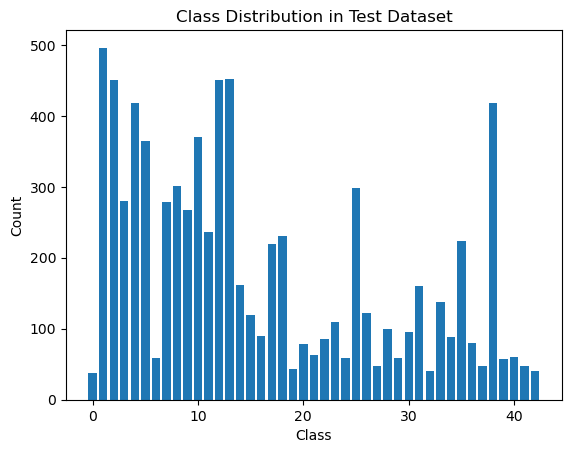

In [6]:
# Plotting the distribution of classes in the test dataset
unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
plt.bar(unique.astype(int), counts)
plt.title('Class Distribution in Test Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Model**

In [7]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:], padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

**Model Compilation and printing the shape after each layer**

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       7

**Model validation**

In [9]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
246/246 [==============================] - 316s 1s/step - loss: 1.9560 - accuracy: 0.4632 - val_loss: 1.1777 - val_accuracy: 0.6631
Epoch 2/25
246/246 [==============================] - 390s 2s/step - loss: 0.2792 - accuracy: 0.9112 - val_loss: 0.1674 - val_accuracy: 0.9515
Epoch 3/25
246/246 [==============================] - 312s 1s/step - loss: 0.1156 - accuracy: 0.9641 - val_loss: 0.0403 - val_accuracy: 0.9872
Epoch 4/25
246/246 [==============================] - 297s 1s/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.0118 - val_accuracy: 0.9969
Epoch 5/25
246/246 [==============================] - 316s 1s/step - loss: 0.0444 - accuracy: 0.9869 - val_loss: 0.0358 - val_accuracy: 0.9906
Epoch 6/25
246/246 [==============================] - 313s 1s/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.0502 - val_accuracy: 0.9871
Epoch 7/25
246/246 [==============================] - 311s 1s/step - loss: 0.0718 - accuracy: 0.9798 - val_loss: 0.0247 - val_accuracy: 0.9927

**saving the model**

In [10]:
model.save("my_model.h5")

**Accuracy Graph**

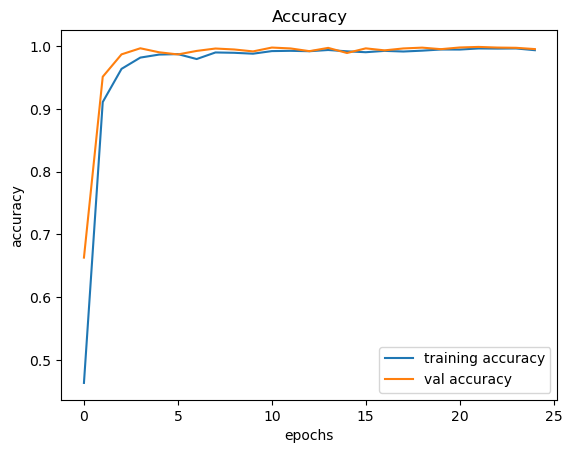

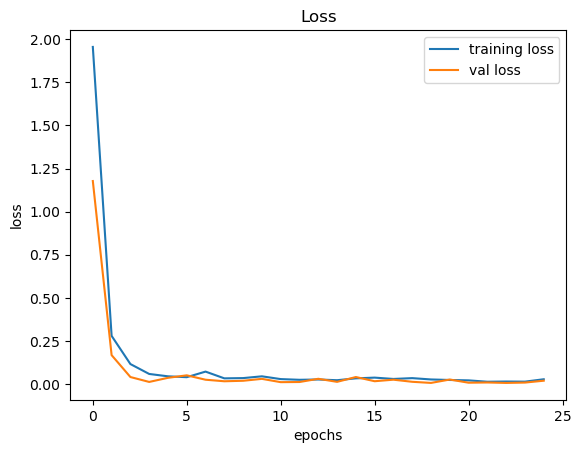

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Printing accuracy on test dataset**

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test).round()
pred = np.argmax(pred, axis=1)

#Accuracy with the test data
print(accuracy_score(labels, pred))

395/395 [==============================] - 32s 80ms/step
0.967458432304038


**saving the model**

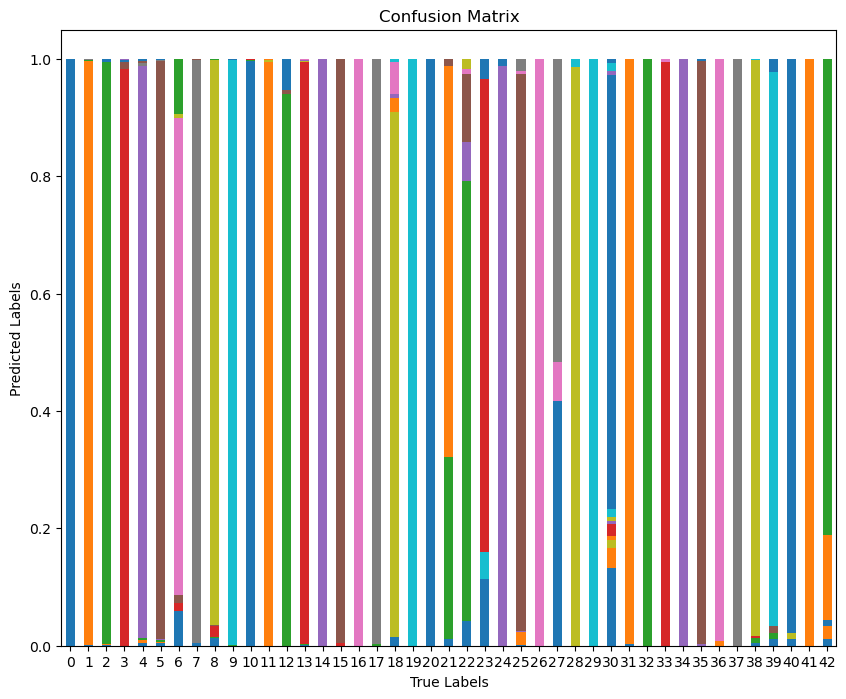

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Confusion Matrix
cm = confusion_matrix(labels, pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix

# Create a pandas DataFrame from the normalized confusion matrix
df_cm = pd.DataFrame(cm_norm, index = [i for i in range(cm.shape[0])], columns = [i for i in range(cm.shape[1])])

# Create a stacked bar chart from the pandas DataFrame
df_cm.plot(kind='bar', stacked=True, figsize=(10,8))

# Set the chart title and labels
plt.title('Confusion Matrix')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.xticks(rotation=0)
plt.legend().remove()  # remove the legend
plt.show()

In [14]:
model.save("traffic_classifier.h5")